<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# df_total 생성

- 구조 : 차종, url, 제조사, 가격, 출시년도, 외형, 리뷰

In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import json
import re

from urllib import parse # url 디코딩 모듈
import numpy as np

In [ ]:
second_df_reviews=pd.read_csv('/content/drive/MyDrive/프로젝트_1/second_comments_DataFrame.csv', index_col=0)
second_df_reviews

,second_car_list,second_url_list,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,['여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자...
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...,"['23년형으로 받았습니다. SUV답지않은 승차감, 부드러우면서도 안정감있고 단단한..."
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...,['제 인생에 있어서 마지막 디젤 세단이 될 것 같네요. 토크빨 맘에 들고 승차감 ...
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...,['승차감이 생각보다 편해서 놀랍습니다. \n연비는 별로 좋지 않고 기타 부분은 만...
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...,['볼보 suv 에서 갈아 탔는데 정숙감도 좋고 코너링도 만족해요\n별탈없이 오래 ...
...,...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...,"['레트로카였지만 이제 클래식카가 된, 다시는 발매될리 없는 리미티드 완소 나의 로..."
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...,['아! 2등이네\n엑셀 휄 커버 4개 )구멍4개짜리) 구입하고싶어요..\n아시...
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,['깔 수 없는 명차 중의 명차\n기아의 자존심과 자부심\n우리나라에서 다시 출시해...
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,['쓸만한 차\n가성비 좋음\n연비좋음\n. ...


In [ ]:
# 현재 오너평가 링크로 저장되어있어서, 기본 전체링크로 변경해주기위해 '%오너평가' 부분 삭제
second_df_reviews.second_url_list.replace('%20%EC%98%A4%EB%84%88%ED%8F%89%EA%B0%80', '', inplace=True, regex=True) # 문자열 일부만 치환하고 싶은 경우는 regex=True 해주어야 함

In [ ]:
df_add=pd.read_csv('/content/drive/MyDrive/프로젝트_1/add_car_info.csv', index_col=0)
df_add

,제조사,가격,출시년도,외형
0,폭스바겐,"3,232만원",2023,준중형 세단
1,캐딜락,"5,851만원",2023,준중형 SUV
2,아우디,"10,997만원",2023,준대형 세단
3,아우디,"8,116만원",2023,중형 세단
4,아우디,"7,182만원",2023,중형 SUV
...,...,...,...,...
4264,닛산,NaN,1991,경형 컨버터블
4265,현대,NaN,1990,소형 해치백
4266,기아,629만원,1990,소형 세단
4267,현대,649만원,1990,준중형 세단


In [ ]:
second_df_reviews

,second_car_list,second_url_list,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,['여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자...
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...,"['23년형으로 받았습니다. SUV답지않은 승차감, 부드러우면서도 안정감있고 단단한..."
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...,['제 인생에 있어서 마지막 디젤 세단이 될 것 같네요. 토크빨 맘에 들고 승차감 ...
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...,['승차감이 생각보다 편해서 놀랍습니다. \n연비는 별로 좋지 않고 기타 부분은 만...
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...,['볼보 suv 에서 갈아 탔는데 정숙감도 좋고 코너링도 만족해요\n별탈없이 오래 ...
...,...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...,"['레트로카였지만 이제 클래식카가 된, 다시는 발매될리 없는 리미티드 완소 나의 로..."
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...,['아! 2등이네\n엑셀 휄 커버 4개 )구멍4개짜리) 구입하고싶어요..\n아시...
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,['깔 수 없는 명차 중의 명차\n기아의 자존심과 자부심\n우리나라에서 다시 출시해...
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,['쓸만한 차\n가성비 좋음\n연비좋음\n. ...


In [ ]:
type(second_df_reviews.comments[0])

str

In [ ]:
# comment 가 현재 str형태로, unnest 함수 사용 위해 list로 변환
for i in range(len(second_df_reviews.comments)):
    second_df_reviews.comments[i] = second_df_reviews.comments[i][2:-3].split("', '")  # 맨앞[' 와 맨뒤 '] 제거후 '. '로 split 하면 list로 변경 가능

In [ ]:
# 중첩배열  https://ahnty0122.tistory.com/10 참고 
import numpy as np
import pandas as pd

def unnest(df, tile, explode):
    vals = df[explode].sum(1)
    rs = [len(r) for r in vals]
    a = np.repeat(df[tile].values, rs, axis=0)
    b = np.concatenate(vals.values)
    d = np.column_stack((a, b))
    return pd.DataFrame(d, columns = tile +  ['_'.join(explode)])

In [ ]:
# 우선 2개의 df 합치기
df_total = pd.concat([second_df_reviews, df_add], axis=1)
df_total

,second_car_list,second_url_list,comments,제조사,가격,출시년도,외형
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,[여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체...,폭스바겐,"3,232만원",2023,준중형 세단
1,2023 캐딜락 XT4,https://search.naver.com/search.naver?where=ne...,"[23년형으로 받았습니다. SUV답지않은 승차감, 부드러우면서도 안정감있고 단단한 ...",캐딜락,"5,851만원",2023,준중형 SUV
2,2023 아우디 S6,https://search.naver.com/search.naver?where=ne...,[제 인생에 있어서 마지막 디젤 세단이 될 것 같네요. 토크빨 맘에 들고 승차감 편...,아우디,"10,997만원",2023,준대형 세단
3,2023 아우디 S4,https://search.naver.com/search.naver?where=ne...,[승차감이 생각보다 편해서 놀랍습니다. \n연비는 별로 좋지 않고 기타 부분은 만족...,아우디,"8,116만원",2023,중형 세단
4,2023 아우디 Q5 스포트백,https://search.naver.com/search.naver?where=ne...,[볼보 suv 에서 갈아 탔는데 정숙감도 좋고 코너링도 만족해요\n별탈없이 오래 타...,아우디,"7,182만원",2023,중형 SUV
...,...,...,...,...,...,...,...
4264,1991 닛산 휘가로,https://search.naver.com/search.naver?where=ne...,"[레트로카였지만 이제 클래식카가 된, 다시는 발매될리 없는 리미티드 완소 나의 로망...",닛산,NaN,1991,경형 컨버터블
4265,1990 엑셀 해치백,https://search.naver.com/search.naver?where=ne...,[아! 2등이네\n엑셀 휄 커버 4개 )구멍4개짜리) 구입하고싶어요..\n아시는...,현대,NaN,1990,소형 해치백
4266,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,[깔 수 없는 명차 중의 명차\n기아의 자존심과 자부심\n우리나라에서 다시 출시해야...,기아,629만원,1990,소형 세단
4267,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,[쓸만한 차\n가성비 좋음\n연비좋음\n. ....,현대,649만원,1990,준중형 세단


In [ ]:
# 램 과부화 방지위해 1000행씩 나눠서 진행
df_total_1 = df_total.loc[:1000]
df_total_2 = df_total.loc[1000:2000]
df_total_3 = df_total.loc[2000:3000]
df_total_4 = df_total.loc[3000:]

In [ ]:
df_total_1 = unnest(df_total_1, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_1

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
354995,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"좋은차입니다.\n연비도, 와관도, 고장없고..!\n차 구입 후 지금까지 한번의 고장없음."
354996,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,디자인 좋고 내구성은 지금까지 만족합니다 실내 디자인이 올드하고 편의장비가 좀 부족해요
354997,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,대중적이지 않습니다. 한국사람들이 선호하는 독일차 브랜드들에서 최고가 모델을 제외한...
354998,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,8년째 타고 있는 차량입니다.디자인 이쁘고 잔고장이 별로 없습니다.지금은 단종된걸로...


In [ ]:
df_total_2 = unnest(df_total_2, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_2

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,차를 구매하기전 꼭 필요한게 무엇인가가 중요합니다.\n가격으로 구매해서 후회한적이 ...
1,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"정숙하고 승차감 대단히 우수하고 만듦새와 실내외 디자인, 편의장치 모두 우수함. 독..."
2,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"역시나 조용하고 잔고장 없고, 7년동안 한번도 잔고장 난적이 없고 딱히 뛰어나지도 ..."
3,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,20대에 사서 바꾸고 싶은데 고장이 안나 제발 좀 바꾸게 적당한 고장 좀 나자..잔...
4,2019 렉서스 IS F 스포츠,https://search.naver.com/search.naver?where=ne...,렉서스,"5,800만원",2019,중형 세단,"6기통 후륜세단., 차량크기도 적당하고 고급스러우며 무엇보다\n흔하지 않아서 좋아요"
...,...,...,...,...,...,...,...
349321,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,패션카로는 1등이 아닌가..\n가성비 최고입니당ㅇㅇㅇㅇㅇㄴㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ
349322,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,* 조향시에 또 민첩하게 움직이지만 무언가 헐렁한 그 느낌을 지울 수 없다. 투어러...
349323,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,가성비 좋은 8기통\n고속주행연비는 기대해볼만하나 시내에선 답도없음\n6.5세대부터...
349324,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,"기대이상으로 만족하면서 타고있습니다 승차감,성능 좋구요\n저렴하다고 생각해서 사려고..."


In [ ]:
df_total_3 = unnest(df_total_3, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_3

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,"연비가 나쁘지도 않은거 같애요 생각보다 앞이랑 사이드가 큽니다 조심성이 필요하고,..."
1,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,6세대 5.0 GT 컨버터블 6년간 타보면서 느낌 점 :\n\n 마력대비 가성비는 ...
2,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,감성과 가성비로 타는 스포츠카\n연비주행하면 연비도 나쁘지 않으나 그러기엔 차가 너...
3,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,머슬카 3대장도 역사의 뒤안길로 사라져가고 있습니다. \n쉐보레 카마로의 단종과 닷...
4,2015 포드 머스탱,https://search.naver.com/search.naver?where=ne...,포드,"4,425만원",2015,스포츠카 쿠페,연비주행을 위한 차는 아니지만 매우 아쉬움\n이 가격에 이 디자인이면 가성비 극강임...
...,...,...,...,...,...,...,...
274757,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,차성능과 스마트카로서의 만족하고있으나\n연비는 최신경쟁차종에비해 현저히 떨어진다.
274758,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,8년간 운행해보니 그래도 안전한 차인건 인정. \n고질적으로 고장나는 부분이 있고 ...
274759,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,고속 주행시 안정감 아주좋고 매우 튼튼해서 안전성도 좋습니다. 그러나 트랜스미션의 ...
274760,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,2012년식 알페온! 10년을 탔지만 만족한다. \n10년전에 다른 차를 샀으면 ...


In [ ]:
df_total_4 = unnest(df_total_4, ['second_car_list','second_url_list','제조사','가격','출시년도','외형'], ['comments'])
# 기준이 되는 열을 2번째 인자로, 분리할 열을 3번째 인자로 호출
df_total_4

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,뷰익 라크로스를 너무 심하게 다운사이징해서 아쉽긴 했지만\n(그랜저급으로 맞추느라고...
1,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,원래는 쌍용차였는데\n음주운전 삼진 아웃되서 차를 매매하고\n추후에 이차를중고로 구...
2,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,전체적으로좋아요 승차감도 좋아요\n전체적으로좋아요 승차감도 좋아요\n전체적으로좋아요...
3,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,전반적으로 만족하지만 연비는 좀 떨어지는 편임\n빼고 잔고장도없고 전반적으로 만족함
4,2012 알페온,https://search.naver.com/search.naver?where=ne...,한국지엠,"2,942만원",2012,준대형 세단,정숙성이우수함이 느껴져서 좋습니다..코너링과 급재동우수한것같습니다..~~
...,...,...,...,...,...,...,...
185813,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
185814,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
185815,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
185816,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


In [ ]:
df_total = pd.concat([df_total_1, df_total_2, df_total_3, df_total_4], ignore_index=True)
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


In [ ]:
df_total.to_csv('/content/drive/MyDrive/프로젝트_1/df_total.csv', encoding='utf-8-sig')

In [ ]:
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


# df total 불러오기

In [ ]:
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd
import json
import re

from urllib import parse # url 디코딩 모듈
import numpy as np

In [2]:
df_total=pd.read_csv('/content/drive/MyDrive/프로젝트_1/df_total.csv', index_col=0)
df_total

,second_car_list,second_url_list,제조사,가격,출시년도,외형,comments
0,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4,2023 폭스바겐 제타,https://search.naver.com/search.naver?where=ne...,폭스바겐,"3,232만원",2023,준중형 세단,시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
...,...,...,...,...,...,...,...
1164901,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902,1990 프라이드 베타,https://search.naver.com/search.naver?where=ne...,기아,629만원,1990,소형 세단,1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,쓸만한 차\n가성비 좋음\n연비좋음\n. .\...
1164904,1990 엘란트라,https://search.naver.com/search.naver?where=ne...,현대,649만원,1990,준중형 세단,부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...


# 워크클라우드 연습

- Mecab 사용, 명사 빈도 count
count = Counter(nouns) 

In [3]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

!pip install chart_studio
# pandas에서 바로 plotly로 그래프를 제작해주는 라이브러리 
!pip install cufflinks

#pandas profiling
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=a5d4d674a6fad219684af66cab2c440165468a188b6d168f7acdd133f5424dfd
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 4.2 MB/s 
     |████████████████████████████████| 9.9 MB 16.8 MB/s 
     |████████████████████████████████| 690 kB 55.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 55.9 MB/s 
     |████████

In [4]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib as mpl

path = '/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
# 폰트 지정
plt.rc('font', family=font_name)

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

fm._rebuild()

GangwonEduPower


In [5]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 4.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

In [7]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# 코랩에서 Mecab 설치 
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,040 kB]
Hit:14 http://ppa.launchpad.n

In [9]:
df_total['comments']

0          여자들이 타기 좋은 차에요 !\n트렁크 공간은 넓으나 뒷자석은 좁구요\n차체 자체 ...
1          저는 차알못이고 신랑이 타는데\n연비는 진짜 미쳤구요\n이전에 미니 타다가 변경해서...
2          가격이 저렴하고 무난한 디자인. 기본 옵션들도 부족함이 별로 없다 생각합니다. 다만...
3          다 좋음 연비좋고 다 좋은데 서비스센터 구리고 엔진노킹 바퀴 소음 디스크문제 해결안...
4          시내주행은 연비 그닥이고 고속도로 정속주행시 연비 20키로 디자인은 개인적으로 깔끔...
                                 ...                        
1164901    처음 산 내 차.\n25년된 올드카지만 생각보다 멀쩡하고 연비도 괜찮다.\n웨건이라...
1164902    1.3 sohc 개솔린 엔진은 특유의 저회전 토크가 강해 800kg 남짓의 차체를 ...
1164903    쓸만한 차\n가성비 좋음\n연비좋음\n.                      .\...
1164904    부품구입이 아직은 어렵지 않어 운행하는데 지장없고 엔진빼고 올 교체(올도색&amp;...
1164905        획기적인 외관. 문방구 퀄리티의 인테리어. 뭔가 엉성한대  부품이 없어 고칠수없는
Name: comments, Length: 1164906, dtype: object

In [10]:
from konlpy.tag import Mecab
from collections import Counter

# Mecab 객체 생성
mecab = Mecab()

# 명사 리스트 생성
nouns = []
for title in tqdm(df_total['comments']):
  noun = mecab.nouns(title)
  nouns.extend(noun)

print(nouns)

# 명사 빈도 카운트
count = Counter(nouns)

display(count)

  0%|          | 0/1164906 [00:00<?, ?it/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({'여자': 7830,
         '차': 540366,
         '트렁크': 38532,
         '공간': 66584,
         '자석': 10722,
         '차체': 19731,
         '자체': 9828,
         '소리': 21980,
         '편': 70664,
         '저': 20575,
         '차알': 493,
         '못': 488,
         '신랑': 205,
         '연비': 505867,
         '이전': 5379,
         '미니': 19858,
         '변경': 3961,
         '승차감': 114644,
         '가격': 147903,
         '디자인': 305773,
         '기본': 18101,
         '옵션': 67772,
         '부족': 41780,
         '생각': 142729,
         '사이드': 2968,
         '미러': 2910,
         '사각지대': 431,
         '서비스': 20649,
         '센터': 16763,
         '엔진': 67747,
         '노킹': 1105,
         '바퀴': 939,
         '소음': 52138,
         '디스크': 858,
         '문제': 36960,
         '해결': 3381,
         '고장': 141778,
         '일': 18673,
         '년': 142671,
         '만': 62867,
         '번호판': 151,
         '처음': 12147,
         '선글라스': 76,
         '케이스': 351,
         '주행': 255409,
         '중': 72839,
  

#다시하기


In [ ]:
count

Counter({'여자': 7830,
         '차': 540366,
         '트렁크': 38532,
         '공간': 66584,
         '자석': 10722,
         '차체': 19731,
         '자체': 9828,
         '소리': 21980,
         '편': 70664,
         '저': 20575,
         '차알': 493,
         '못': 488,
         '신랑': 205,
         '연비': 505867,
         '이전': 5379,
         '미니': 19858,
         '변경': 3961,
         '승차감': 114644,
         '가격': 147903,
         '디자인': 305773,
         '기본': 18101,
         '옵션': 67772,
         '부족': 41780,
         '생각': 142729,
         '사이드': 2968,
         '미러': 2910,
         '사각지대': 431,
         '서비스': 20649,
         '센터': 16763,
         '엔진': 67747,
         '노킹': 1105,
         '바퀴': 939,
         '소음': 52138,
         '디스크': 858,
         '문제': 36960,
         '해결': 3381,
         '고장': 141778,
         '일': 18673,
         '년': 142671,
         '만': 62867,
         '번호판': 151,
         '처음': 12147,
         '선글라스': 76,
         '케이스': 351,
         '주행': 255409,
         '중': 72839,
  

<function matplotlib.pyplot.show(*args, **kw)>

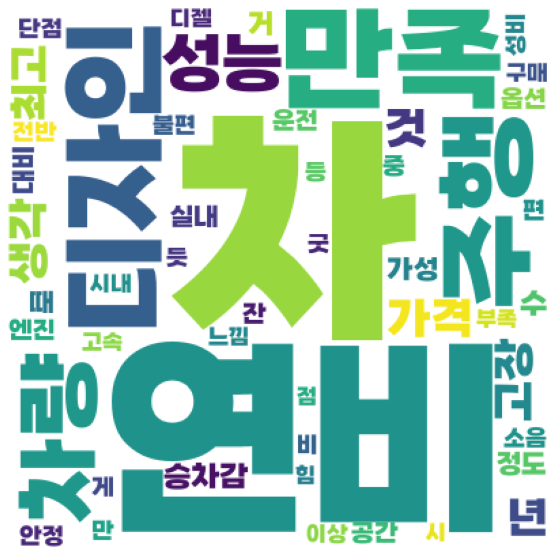

In [11]:
from wordcloud import WordCloud, ImageColorGenerator

wc=WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', width=400, height=400, max_words=50, max_font_size=200)
wc.generate_from_frequencies(dict(count))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show

In [28]:
import requests
from PIL import Image
# # 마스크 이미지를 url에서 불러오기
url = 'https://search.pstatic.net/common?quality=75&direct=true&src=https%3A%2F%2Fimgauto-phinf.pstatic.net%2F20220518_145%2Fauto_1652857421097Fafz2_PNG%2F20220518160311_tsuBoTb6.png'
resp = requests.get(url)

with open('car_img.png', 'wb') as f:  # 'wb' 바이너리모드로 쓰기
    f.write(resp.content)

mask = np.array(Image.open('car_img.png'))

In [30]:
# 네이버에서 크롤링해오는 이미지는 rgba 형식으로, rgb로 변환하는 함수 선언
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

In [36]:
mask = rgba2rgb(mask)

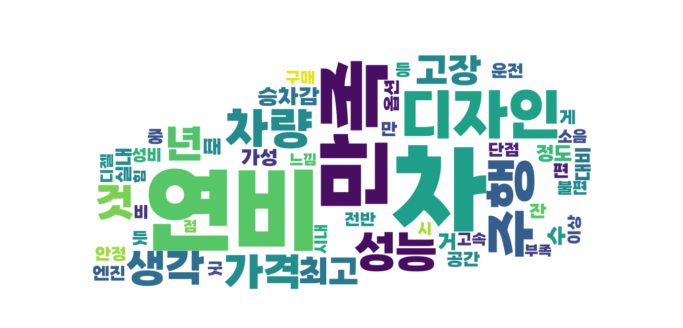

In [37]:
wc = WordCloud(font_path='/content/drive/MyDrive/프로젝트_1/강원교육튼튼.TTF',
             background_color='white', 
             mask = mask,
             max_words=50, max_font_size=200).generate_from_frequencies(dict(count))

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()